# Sensitivity studies using COSIPY

In this tutorial we will go through how to do a sensitivity study of the surface mass balance of a glacier using COSIPY. For a sensitivity study we want to check how much changing a constant affects the calculation of a certain variable. We can do this on essentially any variable, but in our case we will focus on the surface mass balance of the glacier.

Just as in [First steps in COSIPY](first_steps.ipynb) we begin with importing some useful libraries and the cosipy functions we need.

In [1]:
# Have to change the cwd for the ipython session, otherwise COSIPY
# will look for things in the wrong places.
import os
import sys
# This is not really a good method, if cell is re run we end up in the
# wrong directory.
os.chdir('./../')
sys.path.append(os.getcwd())

In [2]:
from cosipy.utils import edu_utils
# cfg gives us the NAMELIST
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Have to tell matplotlib to plot inline
%matplotlib inline

## Choosing the constant to investigate

Before we can continue with setting up the simulations, we have to choose the constant we want to change. As you might remember, the configurable constants used by COSIPY can be displayed

In [4]:
edu_utils.print_options()

,value
albedo_firn,0.55
albedo_fresh_snow,0.85
albedo_ice,0.3
albedo_method,Oerlemans98
densification_method,Boone
input_netcdf,Zhadang/Zhadang_ERA5_2009.nc
output_netcdf,Zhadang_ERA5_20090101-20090110.nc
penetrating_method,Bintanja95
roughness_firn,4
roughness_fresh_snow,0.24


This contains a lot of different things and can be a bit overwhelming at first. It contains variables used in the configuration of where to store files, constants used in some of the sub-modules, and the parameterizations used.

A good guess for a variable affecting the surface mass balance in the winter is the albedo of fresh snow

Let's say we want to change this 10% in either direction. Since the model is overwriting the constants from `opt_dict`, the plan is to change the albedo of fresh snow in there before we use it to initialize the model.

### Initializing the opt_dicts and data files

For this experiment we want to do three runs, one default and two with nudged albedo values. We begin by initializing two instances of the `opt_dict`. Remember that we don't need an `opt_dict` for the default run. 


In [5]:
# First we fetch the default albedo.
default_albedo = edu_utils.OPTIONS['albedo_fresh_snow']
# Up 10%
opt_dict_up = {'albedo_fresh_snow': default_albedo * 1.1}
# Down 10%
opt_dict_dn = {'albedo_fresh_snow': default_albedo * 0.9} 

Did it work?

In [6]:
print(f"Up: {opt_dict_up['albedo_fresh_snow']:.3f}\nDefault: \
{default_albedo:.3f}\nDown: \
{opt_dict_dn['albedo_fresh_snow']:.3f}\n")

Up: 0.935
Default: 0.850
Down: 0.765



<div class="alert alert-warning">
    <b>Question: Can you figure out what to change in the cells above to alter the albedo by 5% instead of 10%?</b>
</div>

We can now go on to creating the files used for storing the data and results of the simulation. Just as with the namlist we need one set of instances for each experiment we want to run, in this case three. 

In [7]:
# Default
IO_def, DATA_def, RESULTS_def = edu_utils.create_IO()
# Up
IO_up, DATA_up, RESULTS_up = edu_utils.create_IO(opt_dict_up)
# Down
IO_dn, DATA_dn, RESULTS_dn = edu_utils.create_IO(opt_dict_dn)


 Maximum available time interval from 2009-01-01T00:00 until 2009-01-31T23:00. Time steps: 744 


--------------------------------------------------------------
	 Integration from 2009-01-01T06:00 to 2009-01-10T00:00
--------------------------------------------------------------

--------------------------------------------------------------
Checking input data .... 

Temperature data (T2) ... ok 
Please check the input data, its seems they are out of range T2 MAX: 261.54 MIN: 238.37 

Relative humidity data (RH2) ... ok 
Shortwave data (G) ... ok 
Wind velocity data (U2) ... ok 
Precipitation data (RRR) ... ok 
Cloud cover data (N) ... ok 
Pressure data (PRES) ... ok 
Snowfall data (SNOWFALL) ... ok 

 Glacier gridpoints: 1 




Output dataset ... ok

 Maximum available time interval from 2009-01-01T00:00 until 2009-01-31T23:00. Time steps: 744 


--------------------------------------------------------------
	 Integration from 2009-01-01T06:00 to 2009-01-10T00:00
-------------------

## Running multiple simulations

We have now prepared the namelists and data/results files for the three different runs we want to do. The runs can initilaized as it was done in the [First steps in COSIPY](first_steps.ipynb) notebook, and changing the namelist and data/results variables manually for each run. But to save us writing the same code multiple times, and to give some inspiration how one might go about running a higher number of simulations, we will now do it in a loop. First we have to put all we need into a list

In [8]:
# List of lists with our experiments
exp_list = [[DATA_def, IO_def, RESULTS_def, None],
            [DATA_dn, IO_dn, RESULTS_dn, opt_dict_dn],
            [DATA_up, IO_up, RESULTS_up, opt_dict_up]
           ]

We can index this list to get the results of experiment 2 as `exp_list[1][2]`.

<div class="alert alert-info">
    <b>Remember that python is zero-indexed.</b>
</div>

Let's setup the loop and run the simulations. This will take some time.

In [9]:
for exp in exp_list:
    # Call run_model once for each experiment
    edu_utils.run_model(exp[0], exp[1], exp[2], exp[3])

Model is running, check progress here: Progress is currently diabled
Finished!
Model is running, check progress here: Progress is currently diabled
Finished!
Model is running, check progress here: Progress is currently diabled
Finished!


## A look at the results

When the simulations has finished running it is time to take a look at the results. Since we're keeping the results in `exp_list` we can again leverage the power of loops to save us writing some code

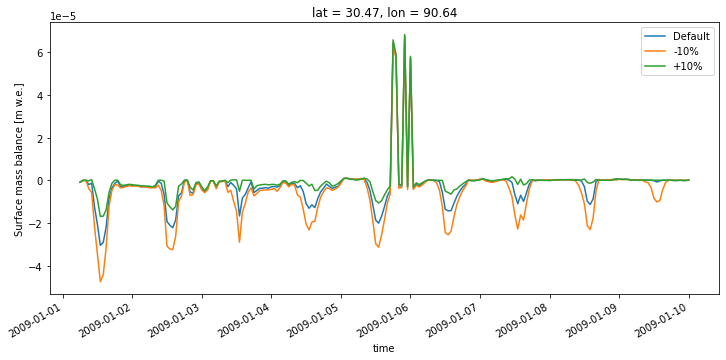

In [10]:
labels = ['Default', '-10%', '+10%']
fig, ax = plt.subplots(figsize=(12, 5))
for exp, label in zip(exp_list, labels):
    # Get the data and plot it RESULTS are kept at the third spot, index 2
    exp[2].surfMB.plot(ax=ax, label=label)
plt.legend(); 

<div class="alert alert-warning">
<details>
    <summary>
    <b>Question: Can you explain why the surface mass balance looks like it does?</b> <i>Click me for an explanation!</i></summary>
<p>We are looking at three different surface mass balance series calculated with three different values for the albedo of fresh snow. The regular dips in the surface mass balance is the diurnal cycle, the glacier lose mass during the day while it remains constant during the night. When the albedo is increased the surface of the glacier will reflect more of the incoming solar radiation during the day. This leads to a decrease in the energy available for melt, thus reducing the melt and resulting in a less negative surface mass balance.
<br><br>
On the other hand, when the albedo is decreased the reflectivity of the glacier is reduced. This increases the energy available for melt which is why the surface mass balance is more negative.</p>
</details>
</div>

*Here you can write your answer (double click to open the cell)* 


## Another sensitivity study

Try to come up with another variable to use for a sensitivity study. The loop for running the simulation is provided below, but you have to initialise the opt_dict(s), data and result datasets and the list containing your experiments.

In [ ]:
# Pick a variable to nudge


In [ ]:
# Initialise the opt_dict(s) and datasets.


In [ ]:
# Pack it all into a list as above


<div class="alert alert-info">
    Are you ready to run the simulation?
</div>

In [ ]:
for exp in exp_list:
    # Call run_model once for each experiment
    edu_utils.run_model(exp[0], exp[1], exp[2], exp[3])

Try plotting the results of your study!

In [ ]:
# Do some plotting here.


## Next steps
[Back to overview](welcome.ipynb)

[Temperature bias experiments](temp_sensitivity.ipynb)
